In [1]:
import sys
sys.path.append("../utils/")

In [2]:
from runner import Runner
from run_competing import RunCompeting
from rank_variants import RankVariants
from discover_pn import DiscoverPN
import pm4py
import pandas as pd

In [3]:
exp_name = "Random1"
script_path = "../Random1/variants-linnea/generate-variants-linnea.py"
args = ["110","180", "116"]
runner = Runner(exp_name, script_path , args)

In [4]:
run_competing = RunCompeting(runner)
#run_competing.generate_run(bRun=True,bGenerate=True)
run_competing.generate_run(bRun=False,bGenerate=False)

ct = run_competing.set_best_flop_duration_as_competing()

In [5]:
ct

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
39,algorithm1,1.655489e+09,1.655489e+09,0.000189,5780000.0,2,0.0,0.000048
44,algorithm5,1.655489e+09,1.655489e+09,0.000209,5780000.0,2,0.0,0.000068
49,algorithm4,1.655489e+09,1.655489e+09,0.000224,5780000.0,2,0.0,0.000083
53,algorithm0,1.655489e+09,1.655489e+09,0.000169,5780000.0,2,0.0,0.000028
57,algorithm3,1.655489e+09,1.655489e+09,0.000215,5780000.0,2,0.0,0.000074
58,algorithm2,1.655489e+09,1.655489e+09,0.000193,5780000.0,2,0.0,0.000052
1,algorithm67,1.655489e+09,1.655489e+09,0.000141,5820000.0,4,40000.0,0.000000


In [6]:
#run_competing.measure_competing_variants(reps=10)
run_competing.prepare_event_data()
measurements = run_competing.duration_competing
measurements.head()

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration
0,algorithm3_8,1.655489e+09,1.655489e+09,0.000191
1,algorithm5_6,1.655489e+09,1.655489e+09,0.000155
2,algorithm1_4,1.655489e+09,1.655489e+09,0.000193
3,algorithm2_0,1.655489e+09,1.655489e+09,0.000214
4,algorithm2_2,1.655489e+09,1.655489e+09,0.000182


In [7]:
ct

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
39,algorithm1,1.655489e+09,1.655489e+09,0.000189,5780000.0,2,0.0,0.000048
44,algorithm5,1.655489e+09,1.655489e+09,0.000209,5780000.0,2,0.0,0.000068
49,algorithm4,1.655489e+09,1.655489e+09,0.000224,5780000.0,2,0.0,0.000083
53,algorithm0,1.655489e+09,1.655489e+09,0.000169,5780000.0,2,0.0,0.000028
57,algorithm3,1.655489e+09,1.655489e+09,0.000215,5780000.0,2,0.0,0.000074
58,algorithm2,1.655489e+09,1.655489e+09,0.000193,5780000.0,2,0.0,0.000052
1,algorithm67,1.655489e+09,1.655489e+09,0.000141,5820000.0,4,40000.0,0.000000



## Initial Hypothesis: Sort algorithms by single-run execution time

In [8]:
alg_list = list(ct.sort_values(by=['case:duration'])['case:concept:name'])
alg_list

['algorithm67',
 'algorithm0',
 'algorithm1',
 'algorithm2',
 'algorithm5',
 'algorithm3',
 'algorithm4']

In [9]:
rank_variants = RankVariants(measurements,alg_list)
ranks = rank_variants.sortAlgs(75,25)
all_ranks, mean_ranks = rank_variants.calculate_mean_rank()

In [10]:
pd.DataFrame(rank_variants.comparision_matrix)

,algorithm67,algorithm0,algorithm1,algorithm2,algorithm5,algorithm3,algorithm4
algorithm67,-1,0,0,0,0,0,0
algorithm0,2,-1,1,-1,-1,-1,-1
algorithm1,2,1,-1,1,-1,-1,-1
algorithm2,2,-1,1,-1,1,-1,-1
algorithm5,2,-1,-1,1,-1,1,-1
algorithm3,2,-1,-1,-1,1,-1,1
algorithm4,2,-1,-1,-1,-1,1,-1


In [11]:
ranks

,case:concept:name,case:rank
0,algorithm0,0
1,algorithm1,0
2,algorithm2,0
3,algorithm5,0
4,algorithm3,0
5,algorithm4,0
6,algorithm67,0


In [12]:
all_ranks

,case:rank,case:rank,case:rank,case:rank,case:rank,case:rank,case:rank
case:concept:name,,,,,,,
algorithm0,0,0,0,0,0,0,0
algorithm1,0,0,0,0,0,0,0
algorithm2,0,0,0,0,0,0,0
algorithm5,0,0,0,0,0,0,0
algorithm67,0,0,0,0,0,0,0
algorithm3,0,0,0,0,0,0,0
algorithm4,0,0,0,0,0,0,0


In [13]:
mean_ranks

,case:concept:name,case:mean-rank
0,algorithm0,0.0
1,algorithm1,0.0
2,algorithm2,0.0
3,algorithm5,0.0
4,algorithm67,0.0
5,algorithm3,0.0
6,algorithm4,0.0


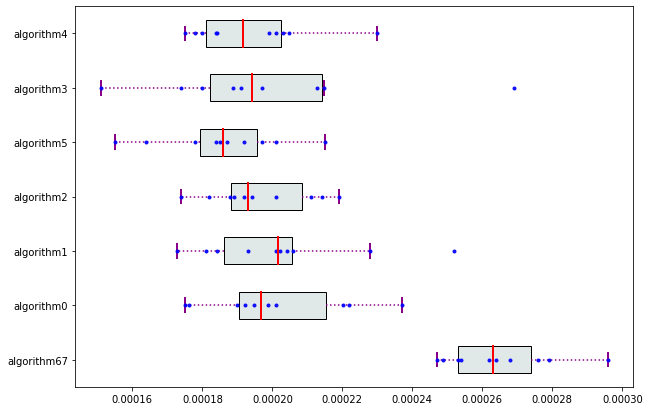

In [14]:
rank_variants.show_measurements_boxplots(outliers=False)

## Insights

In [15]:
et = run_competing.event_table_competing
et

,case:concept:name,concept:name,concept:flops,concept:operation,concept:kernel,timestamp:start,timestamp:end
0,algorithm3_8,syrk_1.4e+06,1400000.0,tmp2 = (M3 M3^T),"syrk!('L', 'N', 1.0, ml2, 0.0, ml5)",1.655489e+09,1.655489e+09
1,algorithm3_8,gemm_1.21e+04,12100.0,tmp13 = (tmp2 + M5^T),"gemm!('N', 'T', 1.0, ml0, ml1, 1.0, ml5)",1.655489e+09,1.655489e+09
2,algorithm5_6,syrk_1.4e+06,1400000.0,tmp2 = (M3 M3^T),"syrk!('L', 'N', 1.0, ml2, 0.0, ml5)",1.655489e+09,1.655489e+09
3,algorithm5_6,gemm_4.36e+06,4360000.0,tmp6 = (tmp2 + (M1 M2^T)),"gemm!('N', 'T', 1.0, ml0, ml1, 1.0, ml5)",1.655489e+09,1.655489e+09
4,algorithm1_4,syrk_1.4e+06,1400000.0,tmp2 = (M3 M3^T),"syrk!('L', 'N', 1.0, ml2, 0.0, ml5)",1.655489e+09,1.655489e+09
...,...,...,...,...,...,...,...
155,algorithm3_7,gemm_1.21e+04,12100.0,tmp13 = (tmp2 + M5^T),"gemm!('N', 'T', 1.0, ml0, ml1, 1.0, ml5)",1.655489e+09,1.655489e+09
156,algorithm2_6,syrk_1.4e+06,1400000.0,tmp2 = (M3 M3^T),"syrk!('L', 'N', 1.0, ml2, 0.0, ml5)",1.655489e+09,1.655489e+09
157,algorithm2_6,gemm_1.21e+04,12100.0,tmp11 = (tmp2 + M4^T),"gemm!('N', 'T', 1.0, ml0, ml1, 1.0, ml5)",1.655489e+09,1.655489e+09
158,algorithm3_0,syrk_1.4e+06,1400000.0,tmp2 = (M3 M3^T),"syrk!('L', 'N', 1.0, ml2, 0.0, ml5)",1.655489e+09,1.655489e+09


In [16]:
pn = DiscoverPN(et)
for trace in pn.event_log:
    alg = trace.attributes['concept:name'].split('_')[0]
    alg_rank = ranks[ranks['case:concept:name'] == alg]['case:rank'].values[0]
    alg_mean_rank = mean_ranks[mean_ranks['case:concept:name'] == alg]['case:mean-rank'].values[0]
    trace.attributes['case:algorithm'] = alg
    trace.attributes['case:rank'] = alg_rank
    trace.attributes['case:mean-rank'] = alg_mean_rank

In [17]:
#for trace in pn.event_log:
#    print(trace.attributes)

In [18]:
def filtered_log_by_rank(log,rank):
    filtered_log = pm4py.filter_log(lambda x: x.attributes['case:rank'] == rank, log)
    return filtered_log

def filtered_log_by_alg_list(log,alg_list):
    filtered_log = pm4py.filter_log(lambda x: x.attributes['case:algorithm'] in alg_list, log)
    return filtered_log

### Algorithm 1

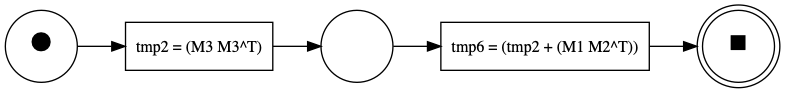

In [19]:
filtered_log_by_alg = filtered_log_by_alg_list(pn.event_log, ['algorithm1'])

# for trace in filtered_log_by_alg:
#     print(trace.attributes)

net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log_by_alg)
pn.visualize_pn(net, im, fm)

### Algorithm 0

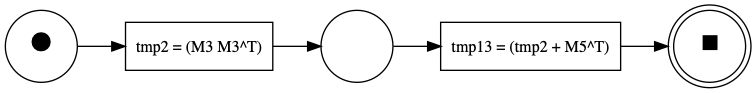

In [20]:
filtered_log_by_alg = filtered_log_by_alg_list(pn.event_log, ['algorithm0'])
net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log_by_alg)
pn.visualize_pn(net, im, fm)

## Work flow: Rank 0 algorithms

### Knernels Used

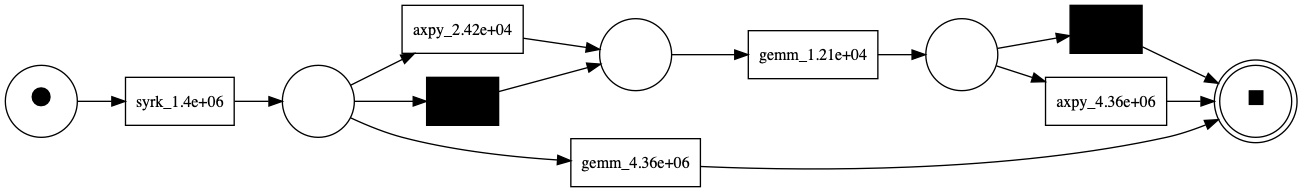

In [21]:
filtered_log=filtered_log_by_rank(pn.event_log,0)
net, im, fm = pn.inductive_miner(filtered_log=filtered_log)
pn.visualize_pn(net, im, fm)

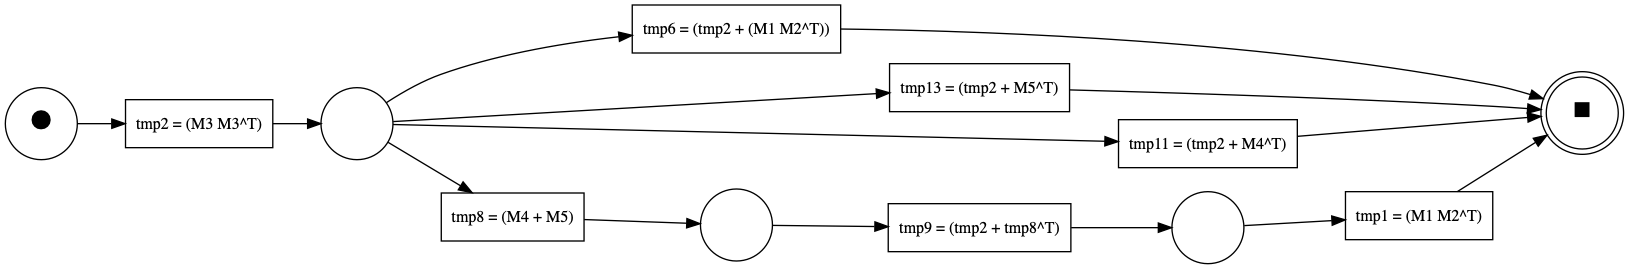

In [22]:
net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log)
pn.visualize_pn(net, im, fm)